# Digital Filters

## Filters



### Bilinear Transform


$H(z) = H(s)$

$s = \frac{2}{T} $

In [1]:
%matplotlib inline

from scipy import signal

import matplotlib
from matplotlib import patches 
import numpy as np
import matplotlib.pyplot as plt

# transfer functions etc.
import control
 

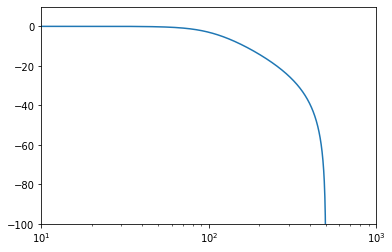

In [2]:

b, a = signal.butter(2, 100,fs=1000)

z,p, k = signal.butter(2, 100, output='zpk', fs=1000)

w, h = signal.freqz_zpk(z, p, k, fs=1000)

fig  = plt.figure()

ax   = fig.add_subplot(111)

ax.plot(w, 20 * np.log10(abs(h)))

ax.set_xscale('log')
ax.axis((10, 1000, -100, 10));

    


Impulse response:

\begin{equation}
 h[n] = \frac{0.06745527 + 0.13491055 + 0.06745527}{ 1  - 1.1429805 +  0.4128016}
\end{equation}



In [135]:
tf = control.TransferFunction(b,a);
tf




      -s - 1
-----------------
0.6425 s + 0.6425

$s = \sigma + j \omega$

$0 = \frac{-s - 1}{0.6425 s + 0.6425}  $


$ = \frac{-(\sigma + j \omega) - 1}{0.6425 (\sigma + j \omega) + 0.6425}$

$ = \frac{-\sigma - j \omega - 1}{0.6425 \sigma +  j 0.6425 \omega  + 0.6425}$




## Plot Poles and Zeros in Z-Plane

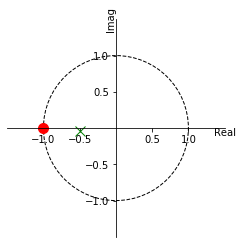

In [141]:
ax = plt.subplot(111)
ax.axis('equal')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    
uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
ax.add_patch(uc)


b, a, k = signal.butter(2, 490, output='zpk', fs=1000)
 
a[0] *= 2   
    
# zeros
z  = np.roots(b)
t1 = plt.plot(z.real, z.imag, 'ro', ms=10);

# poles
p  = np.roots(a)
t2 = plt.plot(p.real, p.imag, 'gx', ms=10)

plt.xlabel('Real')
plt.ylabel('Imag')
ax.xaxis.set_label_coords(1,   0.5)
ax.yaxis.set_label_coords(0.5, 1)
 
